#### Filter dataset with keywords related to certain topics in different languages
Here we use **finance** related keywords and **energy** related keywords. Later when we conduct topic modeling, we can use differnet keywords for detected topics, and produce visualization like this

In [0]:
# import packages
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [0]:
## produce the pie plots as topic distribution within language groups
# submission dataset
df_sub = spark.read.parquet("dbfs:/FileStore/tables/submissions_all")
df_lang = spark.read.parquet("dbfs:/FileStore/tables/submissions_all_lang")

# combine the content of submission title and text together
subs = df_sub.select(concat(col("title"),col("selftext")).alias("text"))
df_lang = df_lang.withColumn('timestamp', col('created_utc').cast('TimeStamp'))


In [0]:
# Russian Stock: фондовая/фондовый/акций/запас(likely means inventory) 
# Russian Market:рынок Commodity:товар Foreign exchange: иностранная валюта trade:торговля
russian_expr = "(фондовая)|(фондовый)|(акций)|(запас)|(рынок)|(товар)|(иностранная валюта)|(торговля)"
print("russian finance keywords counts:", subs.filter(col('text').rlike(russian_expr)).count())

# ukrainian Stock: Фондова/фондовий/біржовий/запас(likely means inventory) 
# ukrainian Market:ринок/ринку Commodity:товар/товарний foreign exchange: іноземна валюта trade:торгівля
ukrainian_expr = "(Фондова)|(фондовий)|(біржовий)|(запас)|(ринок)|(ринку)|(товар)|(товарний)|(іноземна валюта)|(торгівля)"
print("ukrainian finance keywords counts:",subs.filter(col('text').rlike(ukrainian_expr)).count())

english_expr = "([Ss]tock)|([Cc]ommodity)|([Ff]oreign exchange)|([M]market)|([Tt]rade)"
print("english finance keywords counts:", subs.filter(col('text').rlike(english_expr)).count())

russian finance keywords counts: 52
ukrainian finance keywords counts: 53
english finance keywords counts: 1802

In [0]:
# Russian energy:энергия resource:ресурс crude oil:сырая нефть natural gas:природный газ coal:каменный уголь
russian_expr = "(энергия)|(ресурс)|(сырая нефть)|(природный газ)|(каменный уголь)"
print("russian energy keywords count:", subs.filter(col('text').rlike(russian_expr)).count())

# ukrainian energy:енергії resource:ресурс crude oil:сирої нафти natural gas:природний газ coal:вугілля
ukrainian_expr = "(енергії)|(ресурс)|(сирої нафти)|(природний газ)|(вугілля)"
print("ukrainian energy keywords count:", df_sub.filter(col('selftext').rlike(ukrainian_expr)).count())

english_expr = "(energy)|(resource)|(crude oil)|(natural gas)|(coal)"
print("ukrainian energy keywords count:", df_sub.filter(col('selftext').rlike(english_expr)).count())

russian energy keywords count: 34
ukrainian energy keywords count: 29
ukrainian energy keywords count: 1050

In [0]:
print("Russian submission (confidence > 0.9)", df_lang.filter(col("Russian")>0.5).count())
print("Ukrainian submission (confidence > 0.9)", df_lang.filter(col("Ukrainian")>0.5).count())
print("English submission (confidence > 0.9)", df_lang.filter(col("English")>0.95).count())

Russian submission (confidence > 0.9) 1713
Ukrainian submission (confidence > 0.9) 4817
English submission (confidence > 0.9) 176501

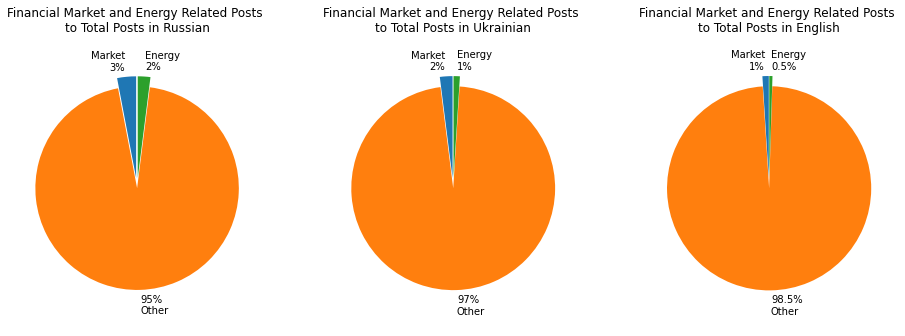

In [0]:
sizes_R = [3,95,2]
sizes_U = [2,97,1]
sizes_E = [1,98.5,0.5]
explode = (0.1, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(14,6))
fig.tight_layout(pad=6.0)

ax1.pie(sizes_R, explode=explode, labels = ['Market\n3%', '95%\nOther', 'Energy\n2%'], labeldistance=1.15,
        shadow=False, startangle=90)#, autopct='%1.0f%%', pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Financial Market and Energy Related Posts \nto Total Posts in Russian", y=1)

ax2.pie(sizes_U, explode=explode, labels = ['Market\n2%', '97%\nOther', 'Energy\n1%'], labeldistance=1.15,
        shadow=False, startangle=90)#, autopct='%1.0f%%',pctdistance=1.1)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Financial Market and Energy Related Posts \nto Total Posts in Ukrainian", y=1)

ax3.pie(sizes_E, explode=explode, labels=['Market\n1%', '98.5%\nOther', 'Energy\n0.5%'], labeldistance=1.15,
        shadow=False, startangle=90)#, autopct='%1.0f%%',pctdistance=1.1)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Financial Market and Energy Related Posts \nto Total Posts in English", y=1)

plt.show()